In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input


import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
class Bayes(object):
    def fit(self, X, Y, smoothing=1e-2):
        N, D = X.shape
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'cov': np.cov(current_x.T) + np.eye(D)*smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, cov = g['mean'], g['cov']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=cov) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


In [3]:
(x,y),(x_,y_) = mnist.load_data()
x = x.reshape(-1,784)
x_ = x_.reshape(-1,784)

print (x.shape,y.shape)
print (x_.shape,y_.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 784) (60000,)
(10000, 784) (10000,)


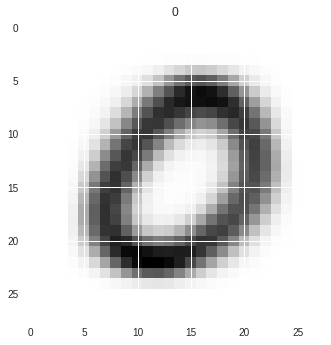

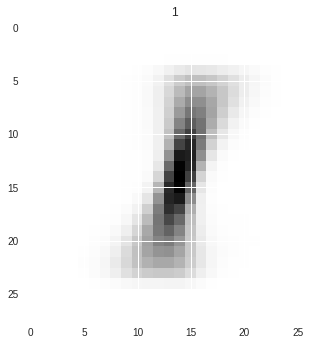

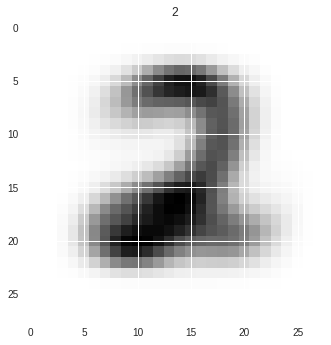

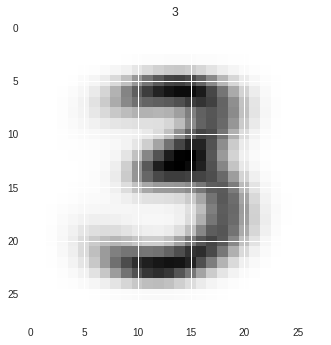

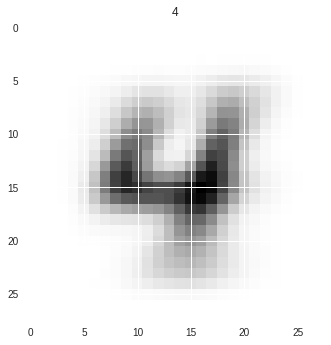

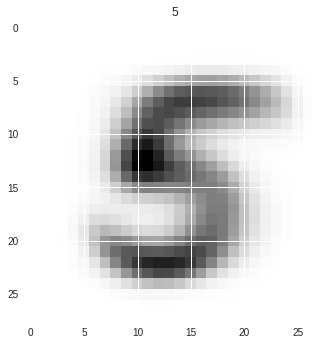

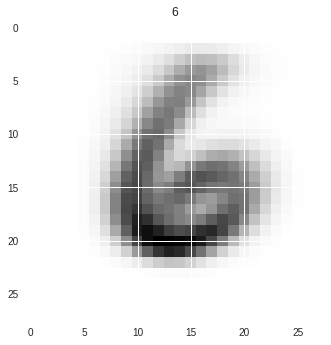

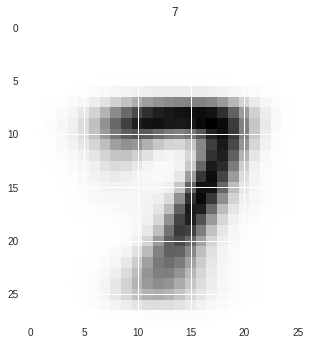

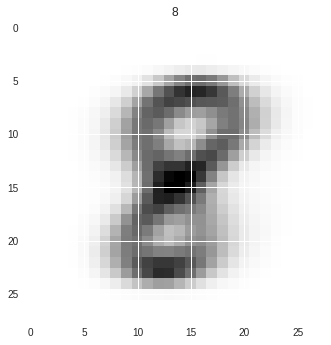

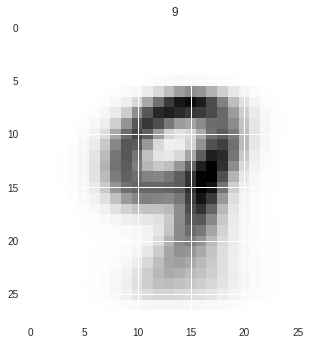

In [4]:
x_train = x
y_train = y
x_test = x_
y_test = y_

model = Bayes()
t0 = datetime.now()
model.fit(x_train, y_train)


# plot the mean of each class
for c, g in iteritems(model.gaussians):
    plt.imshow(g['mean'].reshape(28, 28))
    plt.title(c)
    plt.show()

In [5]:
split = int(x.shape[0]*0.80)

x_train = x[:split]
y_train = y[:split]
x_val = x[split:]
y_val = y[split:]
x_test = x_ 
y_test = y_

print (x_train.shape, x_val.shape, x_test.shape)
print (y_train.shape, y_val.shape, y_test.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000,) (12000,) (10000,)


In [6]:
print("Train accuracy:", model.score(x_train, y_train))
print("Validation accuracy:", model.score(x_val, y_val))
print("Test accuracy:", model.score(x_test, y_test))

Train accuracy: 0.8098125
Validation accuracy: 0.8125
Test accuracy: 0.7809
